In [23]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/mohamed8905/Regression-Models/refs/heads/main/INNHotelsGroup.csv")

df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [25]:
df.describe()
df.drop_duplicates()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [26]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(['Booking_ID'], axis=1)

# Label Encoding
encoder = LabelEncoder()
df['type_of_meal_plan'] = df['type_of_meal_plan'].str.replace("Meal Plan", "").str.replace("Not Selected", "0").astype(int)
df['room_type_reserved'] = df['room_type_reserved'].str.replace("Room_Type", "").astype(int)
df['booking_status'] = encoder.fit_transform(df['booking_status'])
df['market_segment_type'] = encoder.fit_transform(df['market_segment_type'])

# Feature Engineering
df['num_of_days_spend'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df['total_people'] = df['no_of_adults'] + df['no_of_children']
df = df.drop(['no_of_weekend_nights', 'no_of_week_nights', 'no_of_adults', 'no_of_children'], axis=1)

In [27]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
df

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,num_of_days_spend,total_people
0,1,0,1,224,2017,10,2,3,0,0,0,65.00,0,1,3,2
1,0,0,1,5,2018,11,6,4,0,0,0,106.68,1,1,5,2
2,1,0,1,1,2018,2,28,4,0,0,0,60.00,0,0,3,1
3,1,0,1,211,2018,5,20,4,0,0,0,100.00,0,0,2,2
4,0,0,1,48,2018,4,11,4,0,0,0,94.50,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1,0,4,85,2018,8,3,4,0,0,0,167.80,1,1,8,3
36271,1,0,1,228,2018,10,17,4,0,0,0,90.95,2,0,4,2
36272,1,0,1,148,2018,7,1,4,0,0,0,98.39,2,1,8,2
36273,0,0,1,63,2018,4,21,4,0,0,0,94.50,0,0,3,2


In [30]:
# Linear kernel SVM
svm_linear = SVC(kernel='linear', C=1.0)  # C is the regularization parameter
svm_linear.fit(X_train_scaled, y_train)

# Evaluation
y_pred_linear = svm_linear.predict(X_test_scaled)
print(f"Linear Kernel Accuracy: {accuracy_score(y_test, y_pred_linear):0.3%}")
print(classification_report(y_test, y_pred_linear))

Linear Kernel Accuracy: 80.290%
              precision    recall  f1-score   support

           0       0.76      0.59      0.66      3607
           1       0.82      0.91      0.86      7276

    accuracy                           0.80     10883
   macro avg       0.79      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



In [31]:
# Polynomial kernel SVM
svm_poly = SVC(kernel='poly', degree=3, gamma='scale', coef0=1.0, C=1.0)
svm_poly.fit(X_train_scaled, y_train)

# Evaluation
y_pred_poly = svm_poly.predict(X_test_scaled)
print(f"Polynomial Kernel Accuracy: {accuracy_score(y_test, y_pred_poly):0.3%}")
print(classification_report(y_test, y_pred_poly))

Polynomial Kernel Accuracy: 83.148%
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      3607
           1       0.84      0.92      0.88      7276

    accuracy                           0.83     10883
   macro avg       0.82      0.78      0.80     10883
weighted avg       0.83      0.83      0.83     10883



In [32]:
# RBF kernel SVM
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(X_train_scaled, y_train)

# Evaluation
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print(f"RBF Kernel Accuracy: {accuracy_score(y_test, y_pred_rbf):0.3%}")
print(classification_report(y_test, y_pred_rbf))

RBF Kernel Accuracy: 83.350%
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      3607
           1       0.84      0.93      0.88      7276

    accuracy                           0.83     10883
   macro avg       0.83      0.79      0.80     10883
weighted avg       0.83      0.83      0.83     10883



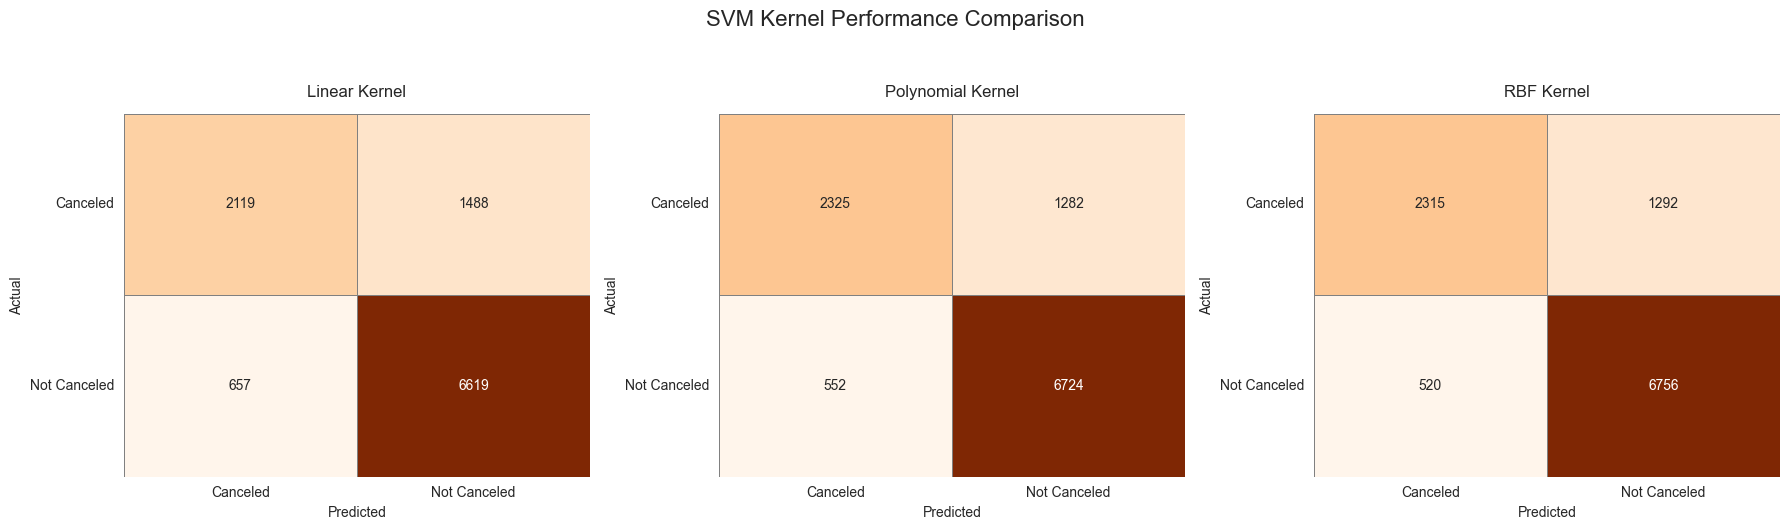

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for all kernels (assuming you already have these)
y_preds = {
    'Linear': y_pred_linear,
    'Polynomial': y_pred_poly,
    'RBF': y_pred_rbf
}

# Create figure with 3 subplots in one row
plt.figure(figsize=(18, 5))
plt.suptitle('SVM Kernel Performance Comparison', y=1.05, fontsize=16)

for i, (kernel, y_pred) in enumerate(y_preds.items(), 1):
    cm = confusion_matrix(y_test, y_pred)

    # Create subplot
    plt.subplot(1, 3, i)
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Oranges',
                cbar=False,
                linewidths=0.5,
                linecolor='gray')

    # Add titles and labels
    plt.title(f'{kernel} Kernel', pad=12)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # For binary classification
    class_names = ['Canceled', 'Not Canceled']
    tick_marks = [0.5, 1.5]
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names, rotation=0)


plt.tight_layout()
plt.show()

In [34]:
alpha = 0.01

models = {
    "Simple (8 neurons, Sigmoid)": MLPClassifier(hidden_layer_sizes=(12,), activation='logistic', max_iter=1000, random_state=42, learning_rate_init=alpha),
    "Deep (43-20-15 neurons, Sigmoid)": MLPClassifier(hidden_layer_sizes=(60,43, 20, 15), activation='logistic', max_iter=1000, random_state=42, learning_rate_init=alpha),
    "Simple (8 neurons, ReLU)": MLPClassifier(hidden_layer_sizes=(12,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=alpha),
    "Deep (43-20-15 neurons, ReLU)": MLPClassifier(hidden_layer_sizes=(60,43, 20, 15), activation='relu', max_iter=1000, random_state=42, learning_rate_init=alpha),
}

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import pandas as pd

# Initialize results storage
results = {
    'Model': [],
    'Test Accuracy': [],
    'CV Mean Accuracy': [],
    'CV Std': [],
    'Predictions': []  # New column to store predictions
}

# Verify shapes
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

# Train and evaluate models
for name, model in models.items():
    print(f"\n\033[1m{'='*50}\033[0m")
    print(f"\033[1mTraining Model: {name}\033[0m")
    print(f"\033[1m{'='*50}\033[0m")

    # 1. Train model
    model.fit(X_train_scaled, y_train)

    # 2. Test evaluation
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    # Store predictions for the Deep ReLU model
    if name == "Deep (43-20-15 neurons, ReLU)":
        y_pred_nn = y_pred.copy()  # Store NN predictions

    # 3. Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Store results
    results['Model'].append(name)
    results['Test Accuracy'].append(acc)
    results['CV Mean Accuracy'].append(cv_scores.mean())
    results['CV Std'].append(cv_scores.std())
    results['Predictions'].append(y_pred)  # Store all predictions

    # Print reports
    print(f"\nAccuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(f"CV Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


X_train_scaled shape: (25392, 15)
y_train shape: (25392,)
X_test_scaled shape: (10883, 15)
y_test shape: (10883,)

Training Model: Simple (8 neurons, Sigmoid)

Accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      3607
           1       0.84      0.93      0.89      7276

    accuracy                           0.84     10883
   macro avg       0.83      0.79      0.81     10883
weighted avg       0.84      0.84      0.83     10883

CV Scores: [0.82949399 0.84071668 0.83832217 0.82217408 0.84009453]
Mean CV Accuracy: 0.8342

Training Model: Deep (43-20-15 neurons, Sigmoid)

Accuracy: 0.8676
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3607
           1       0.90      0.91      0.90      7276

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883

CV Score

In [36]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).set_index("Model")
print("\033[1mFinal Results Summary:\033[0m")
display(results_df[['Test Accuracy', 'CV Mean Accuracy', 'CV Std']].sort_values('Test Accuracy', ascending=False))

Final Results Summary:


,Test Accuracy,CV Mean Accuracy,CV Std
Model,,,
"Deep (43-20-15 neurons, ReLU)",0.873840,0.866690,0.005159
"Deep (43-20-15 neurons, Sigmoid)",0.867592,0.854482,0.005863
"Simple (8 neurons, Sigmoid)",0.838739,0.834160,0.007224
"Simple (8 neurons, ReLU)",0.834604,0.835381,0.008203


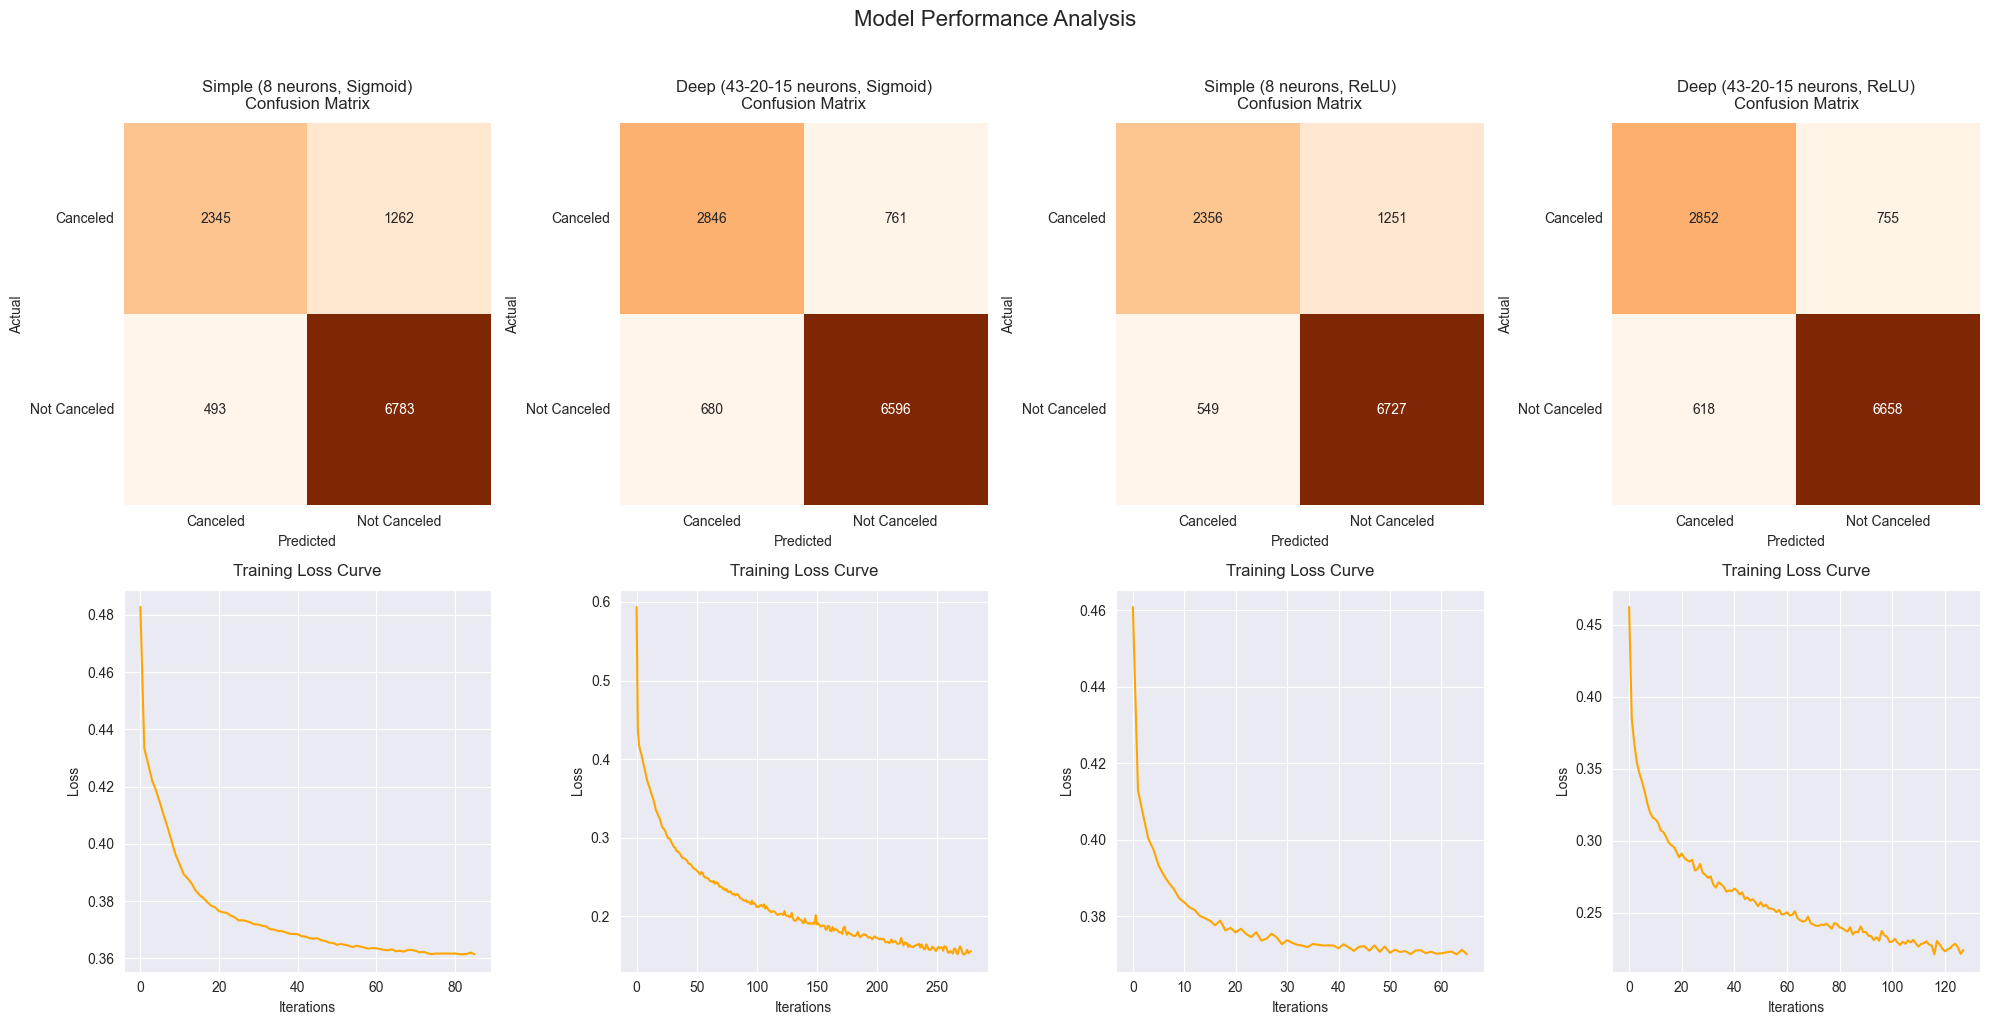

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create figure with subplots
plt.figure(figsize=(20, 10))

# Adjust spacing
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.suptitle('Model Performance Analysis', y=1.02, fontsize=16)

# Create subplots for each model
for i, (name, model) in enumerate(models.items(), 1):

    # Train model if not already trained
    if not hasattr(model, 'loss_curve_'):
        model.fit(X_train_scaled, y_train)

    # Confusion Matrix Subplot
    plt.subplot(2, len(models), i)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
    plt.title(f'{name}\nConfusion Matrix', pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Add class labels if binary classification
    if cm.shape == (2,2):
        plt.xticks([0.5, 1.5], ['Canceled', 'Not Canceled'])
        plt.yticks([0.5, 1.5], ['Canceled', 'Not Canceled'], rotation=0)

    # Loss Curve Subplot
    plt.subplot(2, len(models), i + len(models))
    plt.plot(model.loss_curve_,color='orange', label='Loss')
    plt.title('Training Loss Curve', pad=10)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')


plt.tight_layout()
plt.show()

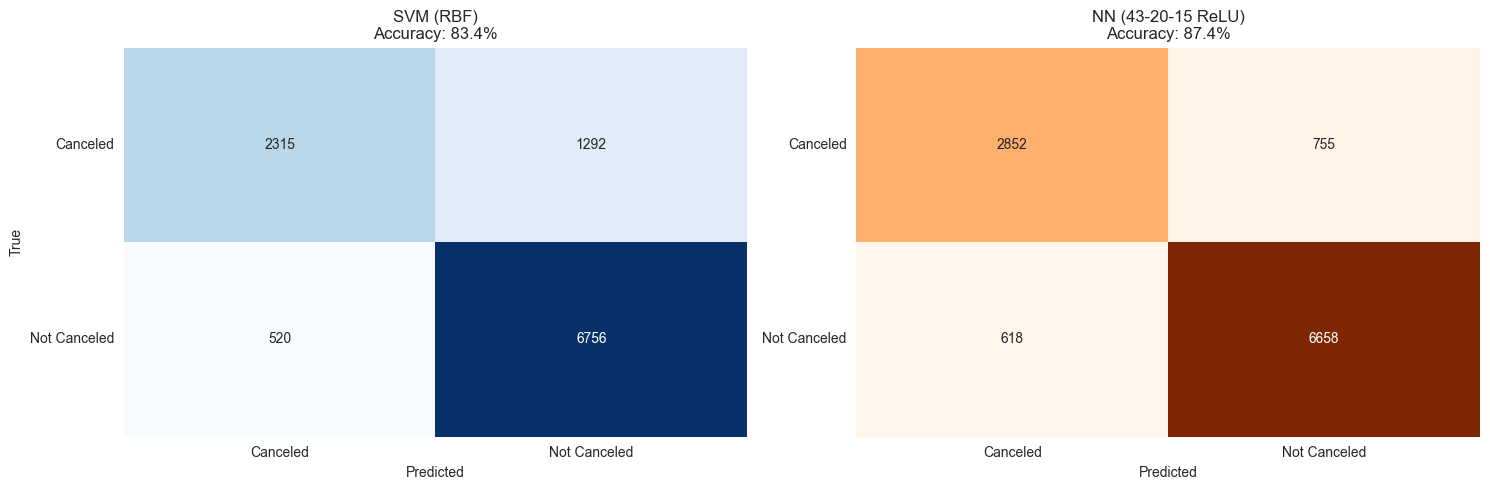


========== MODEL PERFORMANCE COMPARISON ==========

Model           Accuracy   Precision  Recall     F1 Score  
--------------------------------------------------
SVM (RBF)       0.83       0.84       0.93       0.88      
NN DEEP         0.87       0.90       0.92       0.91      


In [38]:
# Set up quick comparison figure
plt.figure(figsize=(15, 5))

# --- 1. SVM (RBF) ---
plt.subplot(1, 2, 1)
cm_svm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'SVM (RBF)\nAccuracy: {accuracy_score(y_test, y_pred_rbf):.1%}')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['Canceled', 'Not Canceled'])
plt.yticks([0.5, 1.5], ['Canceled', 'Not Canceled'], rotation=0)
plt.ylabel('True')

# --- 2. Neural Network (43-20-15 ReLU) ---
plt.subplot(1, 2, 2)
cm_nn = confusion_matrix(y_test, y_pred_nn)  # Replace y_pred_nn with your NN predictions
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title(f'NN (43-20-15 ReLU)\nAccuracy: {accuracy_score(y_test, y_pred_nn):.1%}')
plt.xticks([0.5, 1.5], ['Canceled', 'Not Canceled'])
plt.yticks([0.5, 1.5], ['Canceled', 'Not Canceled'], rotation=0)
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()


from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Calculate scores
Scores = {
    "SVM (RBF)": {
        "Accuracy": accuracy_score(y_test, y_pred_rbf),
        "Recall": recall_score(y_test, y_pred_rbf),
        "F1 Score": f1_score(y_test, y_pred_rbf),
        "Precision": precision_score(y_test, y_pred_rbf)
    },
    "NN DEEP": {
        "Accuracy": accuracy_score(y_test, y_pred_nn),
        "Recall": recall_score(y_test, y_pred_nn),
        "F1 Score": f1_score(y_test, y_pred_nn),
        "Precision": precision_score(y_test, y_pred_nn)
    }
}
svm_test_accuracy = accuracy_score(y_test, y_pred_rbf)
nn_test_accuracy = accuracy_score(y_test, y_pred_nn)

# Print organized comparison
print("\n\033[1m{:=^50}\033[0m".format(" MODEL PERFORMANCE COMPARISON "))
print("\n\033[1m{:<15} {:<10} {:<10} {:<10} {:<10}\033[0m".format(
    "Model", "Accuracy", "Precision", "Recall", "F1 Score"))
print("-"*50)

for model_name, metrics in Scores.items():
    print("{:<15} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(
        model_name,
        metrics["Accuracy"],
        metrics["Precision"],
        metrics["Recall"],
        metrics["F1 Score"]))

print("="*44)

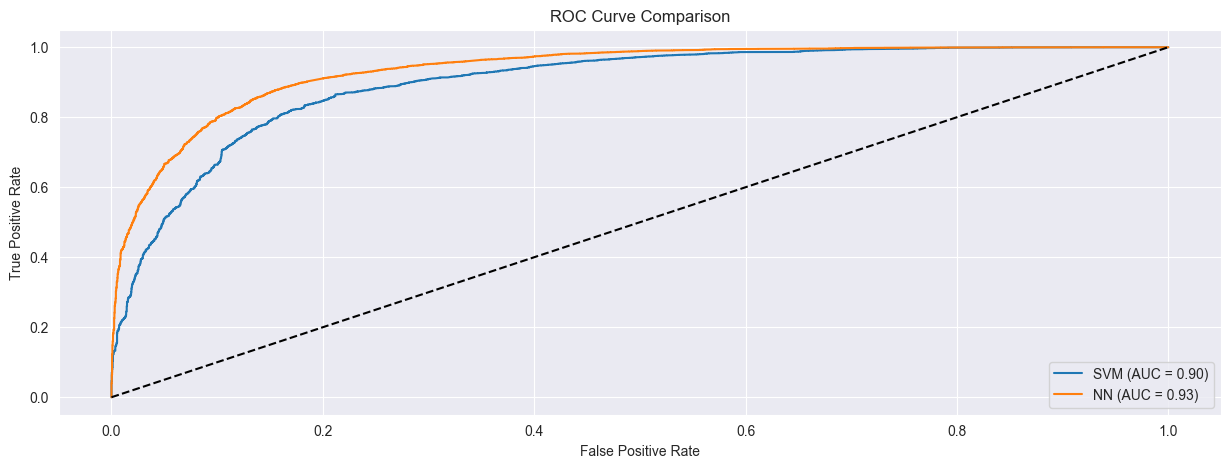

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(15, 5))

# --- 1. ROC Curve ---
# Get predicted probabilities
y_prob_svm = svm_rbf.decision_function(X_test_scaled)  # SVM scores
y_prob_nn = models["Deep (43-20-15 neurons, ReLU)"].predict_proba(X_test_scaled)[:, 1]  # NN probabilities

# Calculate ROC curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

# Plot curves
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'NN (AUC = {auc(fpr_nn, tpr_nn):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

لو المنحنى قريب من الزاوية اليسرى العليا: موديلك جامد فشخ
<br>
<br>

لو المنحنى على الخط القطري (الخط الـ 45 درجة): موديلك بتنجان خالص
<br>
<br>

لو تحت الخط القطري: موديلك أسوأ من حياتك

In [40]:
y_train_pred_svm = svm_rbf.predict(X_train_scaled)
y_train_pred_nn = models["Deep (43-20-15 neurons, ReLU)"].predict(X_train_scaled)

y_test_pred_svm = y_pred_rbf
y_test_pred_nn = y_pred_nn

print("\n\033[1mTraining Accuracy:\033[0m")
print(f"SVM: {accuracy_score(y_train, y_train_pred_svm):.4%}")
print(f"NN:  {accuracy_score(y_train, y_train_pred_nn):.4%}")

print("\n\033[1mTest Accuracy:\033[0m")
print(f"SVM: {accuracy_score(y_test, y_test_pred_svm):.4%}")
print(f"NN:  {accuracy_score(y_test, y_test_pred_nn):.4%}")


Training Accuracy:
SVM: 84.1722%
NN:  90.4694%

Test Accuracy:
SVM: 83.3502%
NN:  87.3840%


<p style="text-align:center;font-size:30px">الحمد لله الموديل مية مية و زي الفل يست الكل</p>